In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
import numpy as np

In [2]:
df = pd.read_csv("./uscities.csv")
X = df[["lat", "lng", "population"]]
y = df.density
label = df.city

X_train, X_test, y_train, y_test = train_test_split(X, y)
train_label, test_label = label[X_train.index], label[X_test.index]

model = Lasso()
model.fit(X_train, y_train)

model.score(X_test, y_test)

0.049750717221652696

In [3]:
model.predict(X_test)

array([485.0311743 , 499.77514462, 488.21123777, ..., 289.64567217,
       456.10231027, 490.61208806])

<AxesSubplot: xlabel='y_True', ylabel='y_pred'>

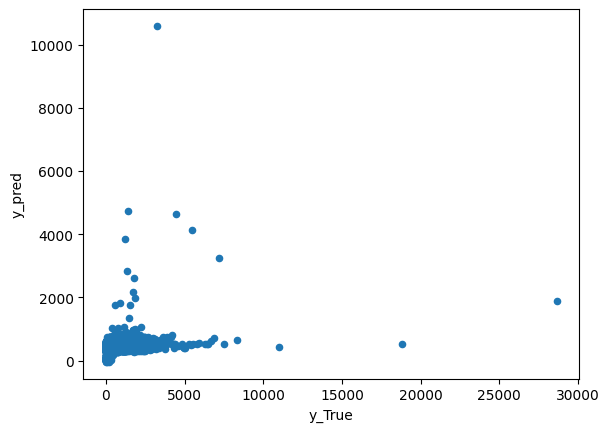

In [4]:
preds = model.predict(X_test)

results = pd.DataFrame({"y_True":np.array(y_test), "y_pred":model.predict(X_test)}, index=test_label)

results.plot(kind="scatter", x="y_True", y="y_pred")